In [1]:
import pandas as pd
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

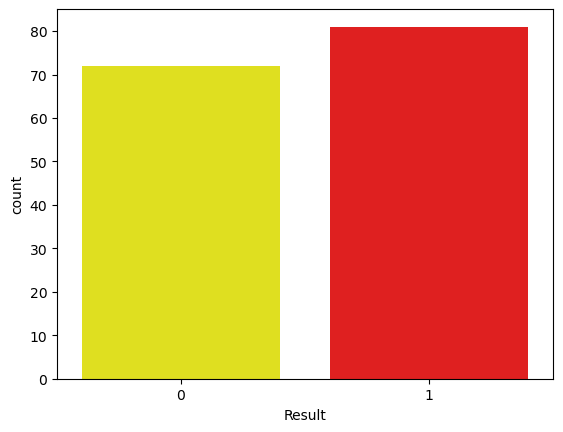

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
#불균형 데이터셋

In [3]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

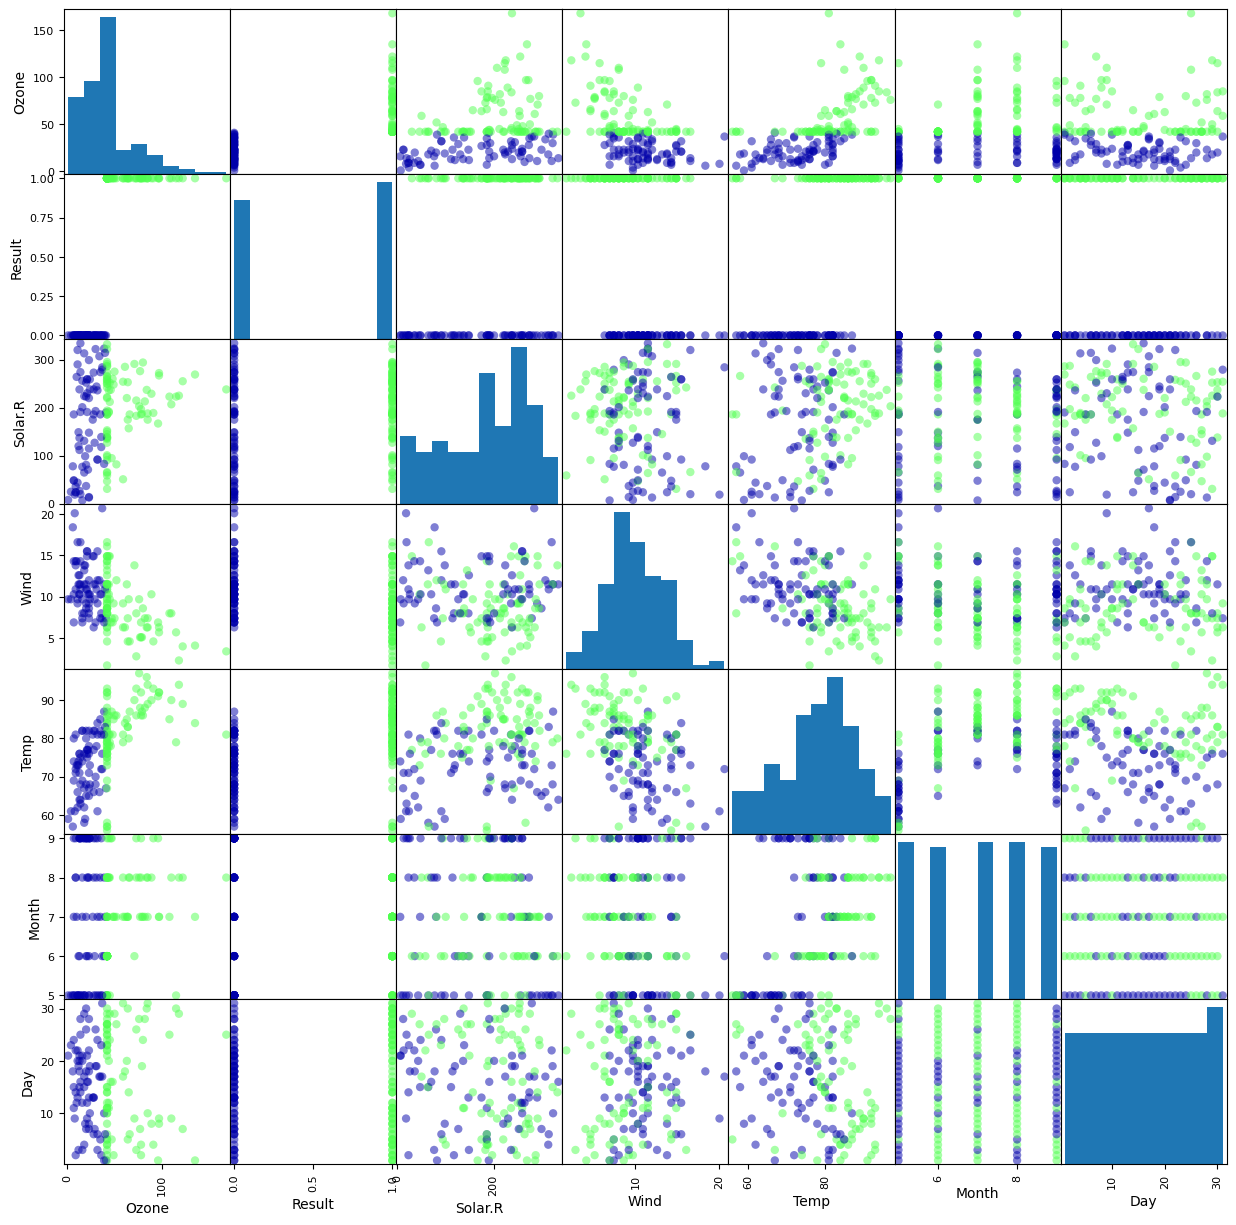

In [4]:
import mglearn
import matplotlib.pyplot as plt
#산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)
plt.show()

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [6]:
X = X_samp[cols]
y = y_samp['Result']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [9]:
import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))

학습용: 0.7565217391304347
검증용: 0.5862068965517241
검증용: 0.5862068965517241


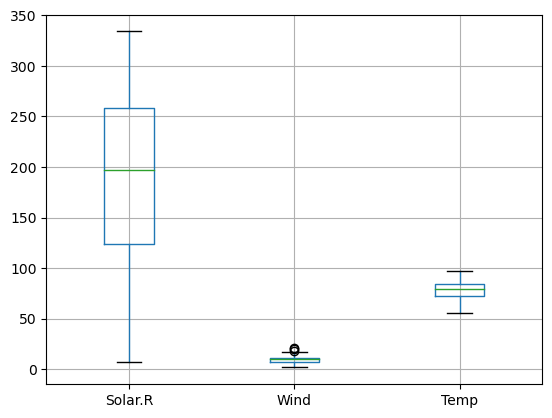

In [10]:
X_train.boxplot()
plt.show()

In [11]:
# Normalization 정규화, 모든 변수의 값이 0~1 사이의 값을 갖도록 조정
# 인공신경망,딥러닝에서 자주 사용
# 변수의 범위를 왜곡하지 않음
# (특정값-최소값)/(최대값-최소값)
# 특정 데이터가 가지는 위치를 보고 싶을 때
# (예) 전체 고객 중 체중이 가장 작은 사람이 40Kg, 가장 큰 사람이 120Kg 일 때
# 40Kg  0으로 변환
# 120Kg 1로 변환
# 80Kg  (80-40)/(120-40) = 40/80 = 0.5로 변환
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)
# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_training) / range_on_training
# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training
print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))
#Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균) / 표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함)
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)
# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)
# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64
            Solar.R          Wind          Temp
count  1.150000e+02  1.150000e+02  1.150000e+02
mean   1.370884e-16 -1.253345e-15  4.614666e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.962623e+00 -2.344608e+00 -2.223487e+00
25%   -6.821378e-01 -7.421780e-01 -5.556450e-01
50%    1.257223e-01 -9.558353e-02  1.740356e-01
75%    8.016869e-01  4.104469e-01  6.952361e-01
max    1.631530e+00  2.996825e+00  2.050357e+00
         Solar.R       Wind       Temp
count  29.000000  29.000000  29.000000
mean    0.019574  -0.040327   0.138091
std     0.885968   0.901161   0.950602
min    -1.742798  -2.035367  -1.702286
25%    -0.643668  -0.742178  -0.555645
50%     0.081757   0.073093   0.069796
75%     0.642313   0.410447   0.903716
max     1.477651   1.844200   1.737637


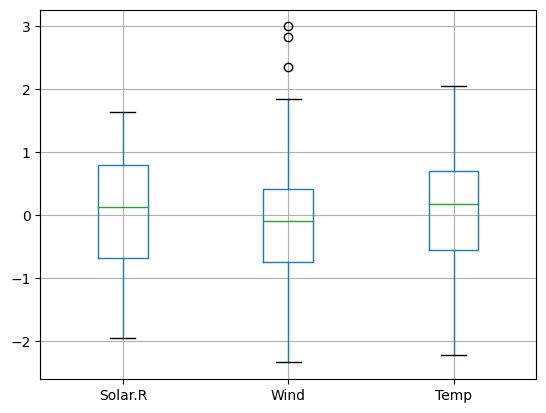

In [12]:
X_train_scaled.boxplot()
plt.show()

In [13]:
#표준화된 데이터로 다시 학습
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#정확도가 높아짐

학습용: 0.7478260869565218
검증용: 0.8275862068965517


c:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
cm

array([[ 7,  7],
       [ 5, 10]], dtype=int64)

In [15]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,7,7
1,5,10


<AxesSubplot:title={'center':'Confusion Matrix'}>

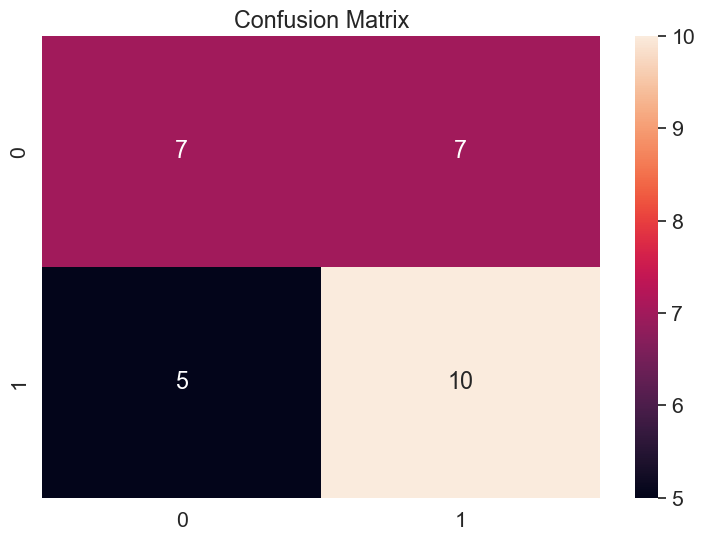

In [16]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)